# CH2: データを可視化し分析を行う
File
| No |  File Name|  |
|---|---|---|
| 1|  order_data.csv | output from ch1 | 


## Nock11: データを読んで不要なものを削除する

In [8]:
import pandas as pd
order_data = pd.read_csv('data/ch2/order_data.csv')
print(len(order_data))
order_data.head()

703880


,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
0,79339111,49,C26387220,50,67393872,2020-04-01 11:00:00,2020-04-01 11:18:00,1,4144,1,浅草店,TK,東京,東京,お持ち帰り,お支払済
1,18941733,85,C48773811,26,91834983,2020-04-01 11:00:00,2020-04-01 11:22:00,0,2877,2,目黒店,TK,東京,東京,デリバリー,お渡し済
2,56217880,76,C66287421,36,64409634,2020-04-01 11:00:00,2020-04-01 11:15:00,0,2603,2,本郷店,TK,東京,東京,デリバリー,お渡し済
3,28447783,190,C41156423,19,73032165,2020-04-01 11:00:00,2020-04-01 11:16:00,0,2732,2,栃木店,TO,北関東,栃木,デリバリー,お渡し済
4,32576156,191,C54568117,71,23281182,2020-04-01 11:00:00,2020-04-01 11:53:00,0,2987,2,伊勢崎店,GU,北関東,群馬,デリバリー,お渡し済


In [9]:
# filter status=1 or status=2 
order_data = order_data.loc[(order_data['status'] == 1)| (order_data['status'] ==2)]
print(len(order_data))
order_data.columns

574436


Index(['order_id', 'store_id', 'customer_id', 'coupon_cd', 'sales_detail_id',
       'order_accept_date', 'delivered_date', 'takeout_flag', 'total_amount',
       'status', 'store_name', 'area_cd', 'wide_area', 'narrow_area',
       'takeout_name', 'status_name'],
      dtype='object')

In [12]:
analyze_data = order_data[[
'store_id','customer_id','coupon_cd','order_accept_date', 
'delivered_date','total_amount','store_name','wide_area',
'narrow_area','takeout_name', 'status_name'
]]
print(analyze_data.shape)
analyze_data.head()

(574436, 11)


,store_id,customer_id,coupon_cd,order_accept_date,delivered_date,total_amount,store_name,wide_area,narrow_area,takeout_name,status_name
0,49,C26387220,50,2020-04-01 11:00:00,2020-04-01 11:18:00,4144,浅草店,東京,東京,お持ち帰り,お支払済
1,85,C48773811,26,2020-04-01 11:00:00,2020-04-01 11:22:00,2877,目黒店,東京,東京,デリバリー,お渡し済
2,76,C66287421,36,2020-04-01 11:00:00,2020-04-01 11:15:00,2603,本郷店,東京,東京,デリバリー,お渡し済
3,190,C41156423,19,2020-04-01 11:00:00,2020-04-01 11:16:00,2732,栃木店,北関東,栃木,デリバリー,お渡し済
4,191,C54568117,71,2020-04-01 11:00:00,2020-04-01 11:53:00,2987,伊勢崎店,北関東,群馬,デリバリー,お渡し済


In [13]:
analyze_data.describe()

,store_id,coupon_cd,total_amount
count,574436.000000,574436.000000,574436.000000
mean,99.113844,49.478758,2960.087555
std,55.913615,28.888993,954.282731
min,1.000000,0.000000,698.000000
25%,51.000000,24.000000,2308.000000
50%,99.000000,49.000000,2808.000000
75%,147.000000,75.000000,3617.000000
max,196.000000,99.000000,5100.000000


In [15]:
analyze_data.dtypes

store_id              int64
customer_id          object
coupon_cd             int64
order_accept_date    object
delivered_date       object
total_amount          int64
store_name           object
wide_area            object
narrow_area          object
takeout_name         object
status_name          object
dtype: object

In [18]:
#change store_id and coupon_cd datatype to string
# can ignore warnings by adding the following two lines
import warnings 
warnings.filterwarnings('ignore')

analyze_data[['store_id', 'coupon_cd']] = analyze_data[['store_id', 'coupon_cd']].astype(str)
analyze_data.dtypes

store_id             object
customer_id          object
coupon_cd            object
order_accept_date    object
delivered_date       object
total_amount          int64
store_name           object
wide_area            object
narrow_area          object
takeout_name         object
status_name          object
dtype: object

In [19]:
# pizza チェーングループ全体の売り上げの統計データ
analyze_data.describe()

,total_amount
count,574436.000000
mean,2960.087555
std,954.282731
min,698.000000
25%,2308.000000
50%,2808.000000
75%,3617.000000
max,5100.000000


# Nock 13: monthly data 

In [21]:
# change data type to datetime from object
analyze_data['order_accept_date'] = pd.to_datetime(analyze_data['order_accept_date'])
analyze_data['order_accept_month'] = analyze_data['order_accept_date'].dt.strftime('%Y%m')
analyze_data[['order_accept_date', 'order_accept_month']].head()


,order_accept_date,order_accept_month
0,2020-04-01 11:00:00,202004
1,2020-04-01 11:00:00,202004
2,2020-04-01 11:00:00,202004
3,2020-04-01 11:00:00,202004
4,2020-04-01 11:00:00,202004


In [23]:
analyze_data.dtypes

store_id                      object
customer_id                   object
coupon_cd                     object
order_accept_date     datetime64[ns]
delivered_date                object
total_amount                   int64
store_name                    object
wide_area                     object
narrow_area                   object
takeout_name                  object
status_name                   object
order_accept_month            object
dtype: object

In [30]:
month_data = analyze_data.groupby('order_accept_month')
month_data['total_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
order_accept_month,,,,,,,,
202004,189414.0,2959.440638,954.271169,698.0,2308.0,2808.0,3586.0,5100.0
202005,195684.0,2960.327799,954.823248,698.0,2308.0,2808.0,3586.0,5100.0
202006,189338.0,2960.486437,953.740057,698.0,2308.0,2808.0,3617.0,5100.0


In [32]:
month_data['total_amount'].sum()

order_accept_month
202004    560559489
202005    579288785
202006    560532581
Name: total_amount, dtype: int64

# Nock 14: visualize monthly data

<Axes: xlabel='order_accept_month'>

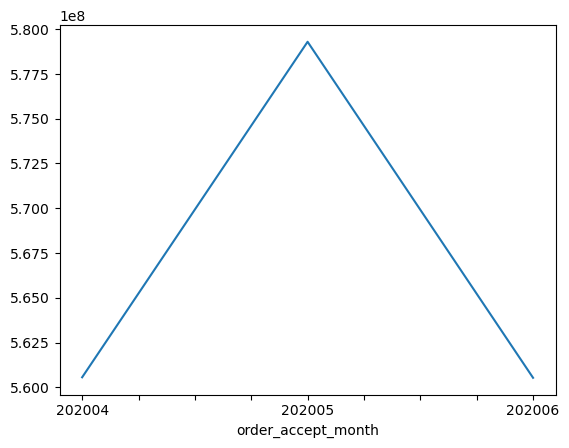

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline 
#月売上合計の推移
month_data['total_amount'].sum().plot()

<Axes: xlabel='order_accept_month'>

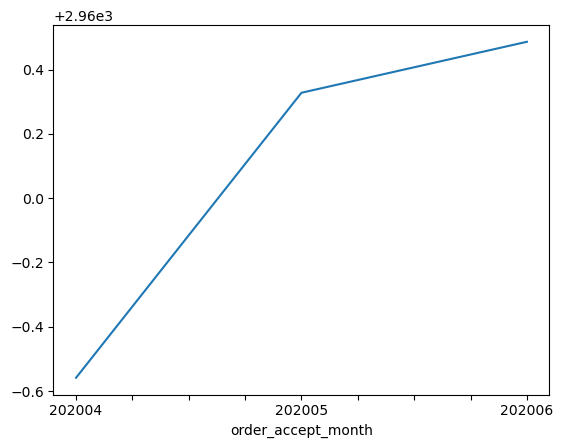

In [34]:
# 平均の推移
month_data['total_amount'].mean().plot()

# Nock 15: 売上からヒストグラムを作成する

(array([ 21524.,      0.,  48969., 135664., 111217.,  77622.,  54146.,
         59814.,  34394.,  31086.]),
 array([ 698. , 1138.2, 1578.4, 2018.6, 2458.8, 2899. , 3339.2, 3779.4,
        4219.6, 4659.8, 5100. ]),
 <BarContainer object of 10 artists>)

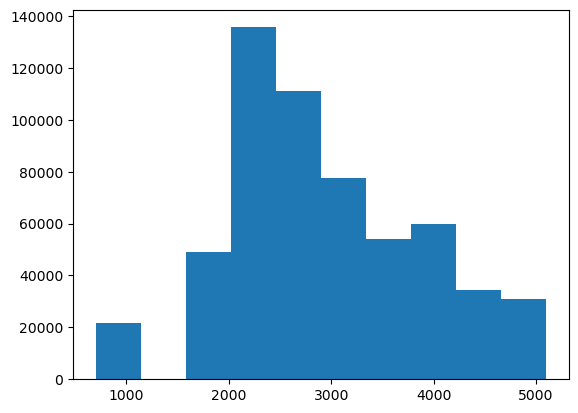

In [35]:
plt.hist(analyze_data['total_amount'])

(array([10728., 10796.,     0.,     0.,     0., 48969., 45777., 78334.,
        23175., 66451., 44368., 38745., 27653., 42503., 12508., 35285.,
        23739., 11151., 23168., 22649.,  8437.]),
 array([ 698.        ,  907.61904762, 1117.23809524, 1326.85714286,
        1536.47619048, 1746.0952381 , 1955.71428571, 2165.33333333,
        2374.95238095, 2584.57142857, 2794.19047619, 3003.80952381,
        3213.42857143, 3423.04761905, 3632.66666667, 3842.28571429,
        4051.9047619 , 4261.52380952, 4471.14285714, 4680.76190476,
        4890.38095238, 5100.        ]),
 <BarContainer object of 21 artists>)

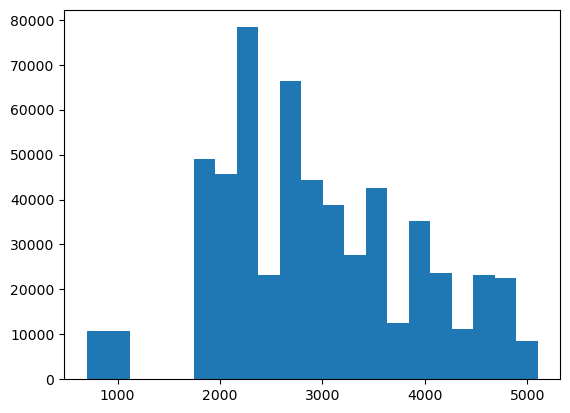

In [36]:
plt.hist(analyze_data['total_amount'],bins=21)